In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as font_manager
from matplotlib.ticker import NullFormatter
%matplotlib inline

from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
rc('text', usetex=True)

In [2]:
x = [0, 10, 25, 50, 75, 100]

## SVHN WRN-40-2 --> WRN-16-1
SVHN_standard_SGD_mean = [10, 10.88, 19.71,  54.83, 64.26, 73.18]
SVHN_KD_AT_mean = [10, 24.57, 40.25, 54.03, 69.69, 77.72]
SVHN_Ours_mean = [94.37, 94.36, 94.37, 94.35, 94.38, 94.41] # 94.41 +/- 0.05
SVHN_student_full_distillation = 95.88
SVHN_student_full = 95.71
SVHN_teacher_full = 96.50


## CIFAR10 WRN-40-2 --> WRN-16-1
CIFAR10_standard_SGD_mean = [10, 25.79, 33.5, 44.88, 55.62,  58.80]
CIFAR10_KD_AT_mean = [10, 40.32, 57, 68, 72, 76]
CIFAR10_Ours_mean = [83.69, 84.68, 84.71, 85.28, 85.75, 85.91] # last over 3 seeds is 85.91 +/- 0.24
CIFAR10_student_full_distillation = 91.92
CIFAR10_student_full = 91.55
CIFAR10_teacher_full = 95.13

x_VID = 100
mean_VID = 81.59


/home/paul/miniconda3/envs/pytorch/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


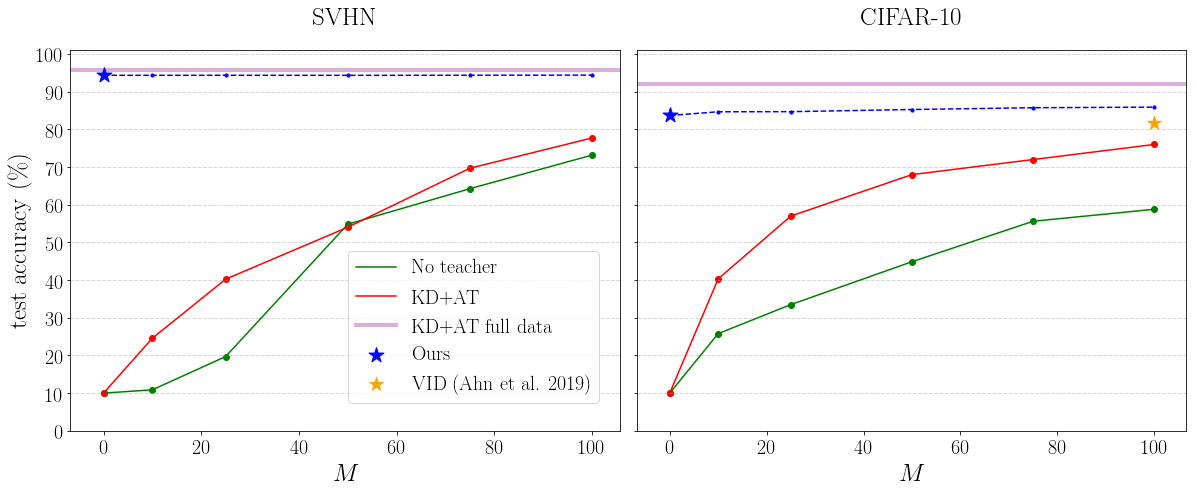

In [3]:
fig = plt.figure(figsize=(20,7))

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ylims, ystep = (0, 101), 10
title_size = 25
title_y = 1.05
label_size = 25
legend_size = 20
tick_size = 20
ours_star_size = 250
vid_star_size = 200
grid_params = {'axis':'y', 'linestyle': '--', 'linewidth': 1, 'alpha':0.5}

## SVHN
ax1.plot(x, SVHN_standard_SGD_mean, color='green', label='No teacher')
ax1.scatter(x, SVHN_standard_SGD_mean, color='green')
ax1.plot(x, SVHN_KD_AT_mean, color='red', label='KD+AT')
ax1.scatter(x, SVHN_KD_AT_mean, color='red')
ax1.plot(x, SVHN_Ours_mean, color='blue', linestyle='--')
ax1.scatter(x[0], SVHN_Ours_mean[0], s=250, color='blue', marker='*', label=r'Ours',)
ax1.scatter(x[1:], SVHN_Ours_mean[1:], color='blue', s=10)
ax1.axhline(y=SVHN_student_full_distillation, color='purple', linewidth=4, alpha=0.3, label=r'KD+AT full data')

ax1.grid(**grid_params)
ax1.set_title(r'SVHN', position=(0.5, title_y), fontsize=title_size)
ax1.set_ylabel(r'test accuracy (\%)', size=label_size)
ax1.set_xlabel(r'$M$', size=label_size)
ax1.tick_params(axis='both', which='major', labelsize=tick_size)
ax1.set_ylim(ylims)
ax1.yaxis.set_ticks(np.arange(ylims[0],ylims[1], ystep))


## CIFAR10
ax2.plot(x, CIFAR10_standard_SGD_mean, color='green', label=r'No teacher')
ax2.scatter(x, CIFAR10_standard_SGD_mean, color='green')
ax2.plot(x, CIFAR10_KD_AT_mean, color='red', label=r'KD+AT')
ax2.scatter(x, CIFAR10_KD_AT_mean, color='red')
ax2.plot(x, CIFAR10_Ours_mean, color='blue', linestyle='--')
ax2.scatter(x[1:], CIFAR10_Ours_mean[1:], color='blue', s=10)
ax2.scatter(x[0], CIFAR10_Ours_mean[0], s=ours_star_size, color='blue', marker='*', label=r'Ours')
ax2.scatter([x_VID], [mean_VID], color='orange', s=vid_star_size, marker='*', label=r'VID (Ahn et al. 2019)')
ax2.axhline(y=CIFAR10_student_full_distillation, color='purple', linewidth=4, alpha=0.3, label=r'KD+AT full data')

ax2.grid(**grid_params)
ax2.set_title(r'CIFAR-10', position=(0.5, title_y), fontsize=title_size)
ax2.set_xlabel(r'$M$', size=label_size)
ax2.tick_params(axis='both', which='major', labelsize=tick_size)
ax2.yaxis.set_ticks(np.arange(ylims[0],ylims[1], ystep))
ax2.yaxis.set_major_formatter(NullFormatter())
ax2.set_ylim(ylims)

ax2.legend(prop={'size': legend_size}, bbox_to_anchor=(-0.05, 0.5))

plt.subplots_adjust(wspace=0.03, hspace=0)
fig.savefig("few_shot_accuracy_plots.pdf", bbox_inches='tight');